In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
from scipy.stats import linregress

# Census & gmaps API Keys
from apikeys import (api_key, gkey)
c = Census(api_key, year=2020)

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
# Load the combined CSV file
combined_df = pd.read_csv("combined.csv")

# Display sample data
combined_df

,Unnamed: 0,State,Name,Lat,Lng,Population,Median Age,Household Income,Per Capita Income,Poverty Count,...,owned_households_%,rented_households_%,homes_#_powered_by_solar,homes_%_powered_by_solar,state_elect_from_solar_%,solar_companies_in_state,MW_currently_installed,MW_growth_projection_5_years,MW_total_in_5_years,MW_output_%_in_5_years
0,12,1,Alabama,32.3774,-86.3005,4893186,39.2,52035,28934,762642,...,70.0,30.0,61870,3.356899,0.0052,35,578,2393,2971,514.013841
1,16,4,Arizona,33.4481,-112.0970,7174064,37.9,61529,32340,990528,...,67.6,32.4,945767,39.447639,0.0970,296,5984,5342,11326,189.271390
2,34,5,Arkansas,34.7470,-92.2891,3011873,38.3,49475,27724,470190,...,67.0,33.0,65256,6.899403,0.0122,27,588,2533,3121,530.782313
3,1,6,California,38.5766,-121.4932,39346023,36.7,78672,38576,4853434,...,55.9,44.1,10133299,80.794535,26.2100,1977,37086,24874,61960,167.071132
4,28,8,Colorado,39.7393,-104.9848,5684926,36.9,75231,39545,544232,...,66.8,33.2,440055,21.927047,0.0595,330,2268,3946,6214,273.985891
5,20,9,Connecticut,41.7658,-72.6734,3570549,41.1,79855,45668,339156,...,66.6,33.4,165593,12.307730,0.0302,135,1137,1011,2148,188.918206
6,47,10,Delaware,39.1573,-75.5197,967679,41.0,69110,36574,107641,...,72.6,27.4,19742,6.451444,0.0459,37,172,508,680,395.348837
7,5,11,District of Columbia,38.8899,-77.0091,701974,34.1,90842,58659,103391,...,41.6,58.4,28186,11.738786,0.4948,157,184,267,451,245.108696
8,7,12,Florida,30.4381,-84.2826,21216924,42.2,57703,32848,2772939,...,67.4,32.6,1144171,15.739379,0.0499,378,9539,10935,20474,214.634658
9,11,13,Georgia,33.7492,-84.3881,10516579,36.9,61224,32427,1461572,...,66.0,34.0,527774,14.882766,0.0469,176,4566,1761,6327,138.567674


The r-value is: 0.1768940875778434


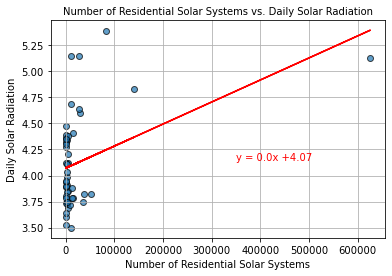

In [3]:
# Graph and linear regression on daily_solar_radiation.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["daily_solar_radiation"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 4.15), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Daily Solar Radiation")
plt.title(f"Number of Residential Solar Systems vs. Daily Solar Radiation", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_daily_solar_radiation.png")

# Show plot
plt.show()

The r-value is: 0.056781705833307876


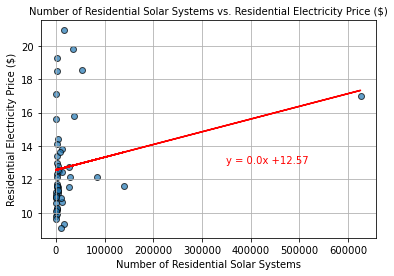

In [4]:
# Graph and linear regression on electricity_price_residential.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["electricity_price_residential"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 13), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Residential Electricity Price ($)")
plt.title(f"Number of Residential Solar Systems vs. Residential Electricity Price ($)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_electricity_price_residential.png")

# Show plot
plt.show()

The r-value is: 0.10980708238072764


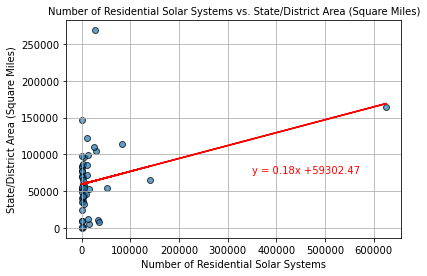

In [5]:
# Graph and linear regression on square_miles.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["square_miles"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 75000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("State/District Area (Square Miles)")
plt.title(f"Number of Residential Solar Systems vs. State/District Area (Square Miles)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_square_miles.png")

# Show plot
plt.show()

The r-value is: 0.00044710142906488804


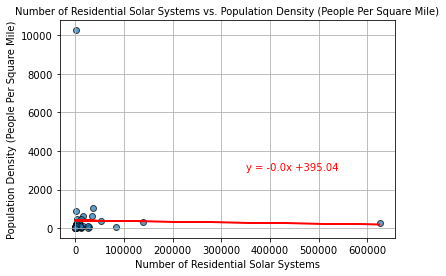

In [6]:
# Graph and linear regression on pop_density.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["pop_density"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 3000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Population Density (People Per Square Mile)")
plt.title(f"Number of Residential Solar Systems vs. Population Density (People Per Square Mile)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_pop_density.png")

# Show plot
plt.show()

The r-value is: 0.5397707924536221


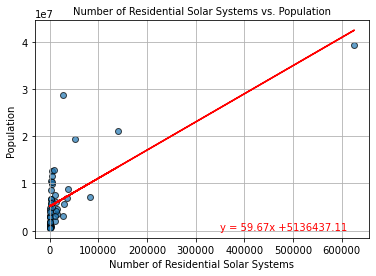

In [7]:
# Graph and linear regression on population.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Population"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 3000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Population ")
plt.title(f"Number of Residential Solar Systems vs. Population", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_population.png")

# Show plot
plt.show()

The r-value is: 0.006937545754935516


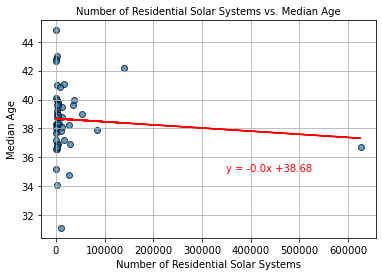

In [8]:
# Graph and linear regression on Median Age.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Median Age"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 35), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Median Age")
plt.title(f"Number of Residential Solar Systems vs. Median Age", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_median_age.png")

# Show plot
plt.show()

The r-value is: 0.045597963786302584


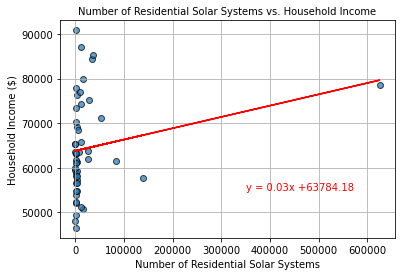

In [9]:
# Graph and linear regression on Household Income.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Household Income"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 55000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Household Income ($)")
plt.title(f"Number of Residential Solar Systems vs. Household Income", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_household_income.png")

# Show plot
plt.show()

The r-value is: 0.01275742332664642


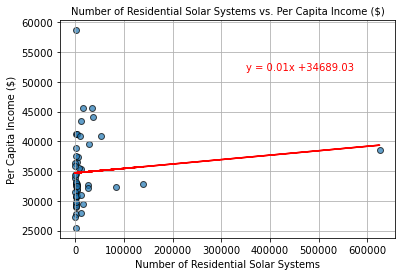

In [10]:
# Graph and linear regression on Per Capita Income.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Per Capita Income"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 52000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Per Capita Income ($)")
plt.title(f"Number of Residential Solar Systems vs. Per Capita Income ($)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_per_capita_income.png")

# Show plot
plt.show()

The r-value is: 0.4932259196674633


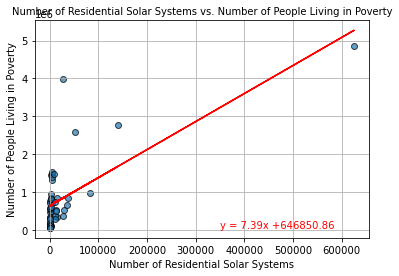

In [11]:
# Graph and linear regression on Poverty Count.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Poverty Count"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 52000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Number of People Living in Poverty")
plt.title(f"Number of Residential Solar Systems vs. Number of People Living in Poverty", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_poverty_count.png")

# Show plot
plt.show()

The r-value is: 9.775501879641177e-07


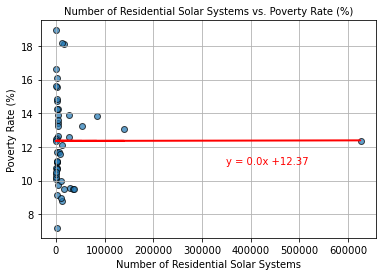

In [12]:
# Graph and linear regression on Poverty Rate.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Poverty Rate"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 11), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Poverty Rate (%)")
plt.title(f"Number of Residential Solar Systems vs. Poverty Rate (%)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_poverty_rate.png")

# Show plot
plt.show()

The r-value is: 0.044184678811169


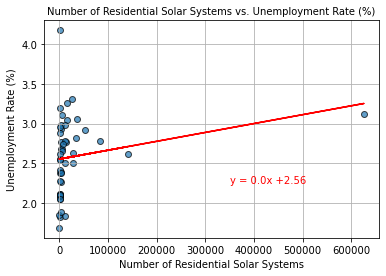

In [13]:
# Graph and linear regression on Unemployment Rate.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Unemployment Rate"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 2.25), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Unemployment Rate (%)")
plt.title(f"Number of Residential Solar Systems vs. Unemployment Rate (%)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_unemployment_rate.png")

# Show plot
plt.show()

The r-value is: 0.0009728861989492477


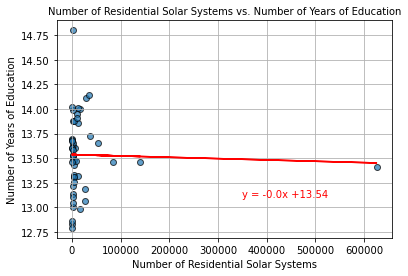

In [14]:
# Graph and linear regression on number_of_years_of_education.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["number_of_years_of_education"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 13.1), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Number of Years of Education")
plt.title(f"Number of Residential Solar Systems vs. Number of Years of Education", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_number_of_years_of_education.png")

# Show plot
plt.show()

The r-value is: 0.4918163406481241


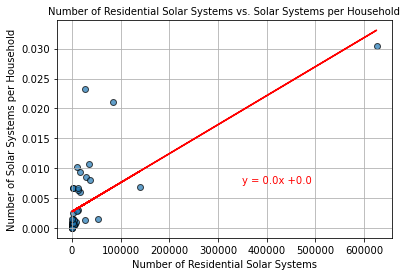

In [15]:
# Graph and linear regression on number_of_solar_system_per_household.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["number_of_solar_system_per_household"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, .0075), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Number of Solar Systems per Household")
plt.title(f"Number of Residential Solar Systems vs. Solar Systems per Household", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_number_of_solar_systems_per_household.png")

# Show plot
plt.show()

The r-value is: 0.14728438225662202


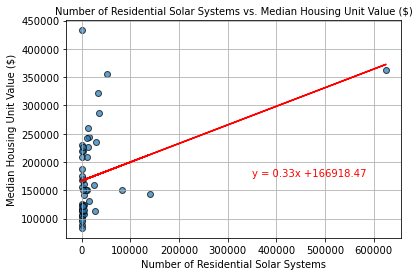

In [16]:
# Graph and linear regression on housing_unit_median_value.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["housing_unit_median_value"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 175000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Median Housing Unit Value ($)")
plt.title(f"Number of Residential Solar Systems vs. Median Housing Unit Value ($)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_housing_unit_median_value.png")

# Show plot
plt.show()

The r-value is: 0.9989311947097201


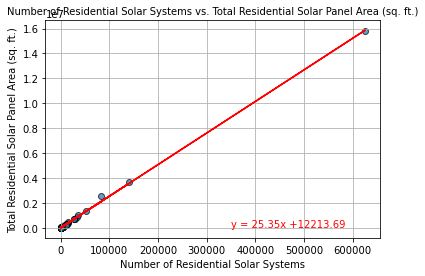

In [17]:
# Graph and linear regression on total_panel_area_residential.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["total_panel_area_residential"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 52000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Total Residential Solar Panel Area (sq. ft.)")
plt.title(f"Number of Residential Solar Systems vs. Total Residential Solar Panel Area (sq. ft.)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_total_panel_area_residential.png")

# Show plot
plt.show()

The r-value is: 0.11181794535448862


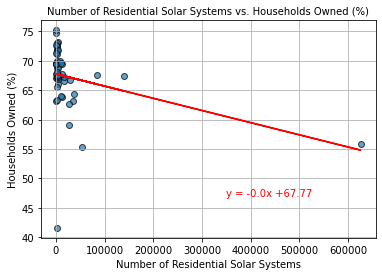

In [18]:
# Graph and linear regression on owned_households_%.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["owned_households_%"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 47), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Households Owned (%)")
plt.title(f"Number of Residential Solar Systems vs. Households Owned (%)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_owned_households_%.png")

# Show plot
plt.show()

In [19]:
# Load the combined CSV file
combined_df = pd.read_csv("combined.csv")

# Display sample data
combined_df

,Unnamed: 0,State,Name,Lat,Lng,Population,Median Age,Household Income,Per Capita Income,Poverty Count,...,owned_households_%,rented_households_%,homes_#_powered_by_solar,homes_%_powered_by_solar,state_elect_from_solar_%,solar_companies_in_state,MW_currently_installed,MW_growth_projection_5_years,MW_total_in_5_years,MW_output_%_in_5_years
0,12,1,Alabama,32.3774,-86.3005,4893186,39.2,52035,28934,762642,...,70.0,30.0,61870,3.356899,0.0052,35,578,2393,2971,514.013841
1,16,4,Arizona,33.4481,-112.0970,7174064,37.9,61529,32340,990528,...,67.6,32.4,945767,39.447639,0.0970,296,5984,5342,11326,189.271390
2,34,5,Arkansas,34.7470,-92.2891,3011873,38.3,49475,27724,470190,...,67.0,33.0,65256,6.899403,0.0122,27,588,2533,3121,530.782313
3,1,6,California,38.5766,-121.4932,39346023,36.7,78672,38576,4853434,...,55.9,44.1,10133299,80.794535,26.2100,1977,37086,24874,61960,167.071132
4,28,8,Colorado,39.7393,-104.9848,5684926,36.9,75231,39545,544232,...,66.8,33.2,440055,21.927047,0.0595,330,2268,3946,6214,273.985891
5,20,9,Connecticut,41.7658,-72.6734,3570549,41.1,79855,45668,339156,...,66.6,33.4,165593,12.307730,0.0302,135,1137,1011,2148,188.918206
6,47,10,Delaware,39.1573,-75.5197,967679,41.0,69110,36574,107641,...,72.6,27.4,19742,6.451444,0.0459,37,172,508,680,395.348837
7,5,11,District of Columbia,38.8899,-77.0091,701974,34.1,90842,58659,103391,...,41.6,58.4,28186,11.738786,0.4948,157,184,267,451,245.108696
8,7,12,Florida,30.4381,-84.2826,21216924,42.2,57703,32848,2772939,...,67.4,32.6,1144171,15.739379,0.0499,378,9539,10935,20474,214.634658
9,11,13,Georgia,33.7492,-84.3881,10516579,36.9,61224,32427,1461572,...,66.0,34.0,527774,14.882766,0.0469,176,4566,1761,6327,138.567674


In [20]:
# Set the base map API code
gmaps.configure(api_key=gkey)

# Heat map for MW currently installed by state (large point radius)
# Store the location and MW currently installed data for use in the heat map weight
coord = combined_df[["Lat", "Lng"]].astype(float)
MW_current = combined_df["MW_currently_installed"].astype(float)

# Create the base map
map = gmaps.figure(map_type="HYBRID", layout={"width": "1920px", "height": "1080px", "padding": "3px", "border": "3px solid black"})

# Create the heat layer and add to the base map
heat_layer = gmaps.heatmap_layer(coord, weights = MW_current, dissipating = False, point_radius = 3)
map.add_layer(heat_layer)

# Display the map
map

Figure(layout=FigureLayout(border='3px solid black', height='1080px', padding='3px', width='1920px'))

In [21]:
# Heat map for MW currently installed by state (small point radius)
# Store the location and MW currently installed data for use in the heat map weight
coord = combined_df[["Lat", "Lng"]].astype(float)
MW_current_small_point = combined_df["MW_currently_installed"].astype(float)

# Create the base map
map = gmaps.figure(map_type="HYBRID", layout={"width": "1920px", "height": "1080px", "padding": "3px", "border": "3px solid black"})

# Create the heat layer and add to the base map
heat_layer = gmaps.heatmap_layer(coord, weights = MW_current_small_point, dissipating = False, point_radius = 1)
map.add_layer(heat_layer)

# Display the map
map

Figure(layout=FigureLayout(border='3px solid black', height='1080px', padding='3px', width='1920px'))

In [22]:
# Heat map for projected solar growth by state (large point radius)
# Store the location and MW projected data for use in the heat map weight
coord = combined_df[["Lat", "Lng"]].astype(float)
MW_projected = combined_df["MW_growth_projection_5_years"].astype(float)

# Create the base map
map = gmaps.figure(map_type="HYBRID", layout={"width": "1920px", "height": "1080px", "padding": "3px", "border": "3px solid black"})

# Create the heat layer and add to the base map
heat_layer = gmaps.heatmap_layer(coord, weights = MW_projected, dissipating = False, point_radius = 3)
map.add_layer(heat_layer)

# Display the map
map

Figure(layout=FigureLayout(border='3px solid black', height='1080px', padding='3px', width='1920px'))

In [23]:
# Heat map for projected solar growth by state (small point radius)
# Store the location and MW projected data for use in the heat map weight
coord = combined_df[["Lat", "Lng"]].astype(float)
MW_projected_small_point = combined_df["MW_growth_projection_5_years"].astype(float)

# Create the base map
map = gmaps.figure(map_type="HYBRID", layout={"width": "1920px", "height": "1080px", "padding": "3px", "border": "3px solid black"})

# Create the heat layer and add to the base map
heat_layer = gmaps.heatmap_layer(coord, weights = MW_projected_small_point, dissipating = False, point_radius = 1)
map.add_layer(heat_layer)

# Display the map
map

Figure(layout=FigureLayout(border='3px solid black', height='1080px', padding='3px', width='1920px'))

In [24]:
# Heat map showing daily solar radiation by state
# Store the location and daily solar radiation data for use in the heat map weight
coord = combined_df[["Lat", "Lng"]].astype(float)
solar_radiation = combined_df["daily_solar_radiation"].astype(float)

# Create the base map
map = gmaps.figure(map_type="HYBRID", layout={"width": "1920px", "height": "1080px", "padding": "3px", "border": "3px solid black"})

# Create the heat layer and add to the base map
heat_layer = gmaps.heatmap_layer(coord, weights = solar_radiation, dissipating = False, point_radius = 1)
map.add_layer(heat_layer)

# Display the map
map

Figure(layout=FigureLayout(border='3px solid black', height='1080px', padding='3px', width='1920px'))

In [25]:
# Heat map showing per capita income by state
# Store the location and per capita income data for use in the heat map weight
coord = combined_df[["Lat", "Lng"]].astype(float)
per_capita = combined_df["Per Capita Income"].astype(float)

# Create the base map
map = gmaps.figure(map_type="HYBRID", layout={"width": "1920px", "height": "1080px", "padding": "3px", "border": "3px solid black"})

# Create the heat layer and add to the base map
heat_layer = gmaps.heatmap_layer(coord, weights = per_capita, dissipating = False, point_radius = 1)
map.add_layer(heat_layer)

# Display the map
map

Figure(layout=FigureLayout(border='3px solid black', height='1080px', padding='3px', width='1920px'))

In [26]:
# Heat map showing electricity costs by state
# Store the location and residential electricity cost data for use in the heat map weight
coord = combined_df[["Lat", "Lng"]].astype(float)
elect_price = combined_df["electricity_price_residential"].astype(float)

# Create the base map
map = gmaps.figure(map_type="HYBRID", layout={"width": "1920px", "height": "1080px", "padding": "3px", "border": "3px solid black"})

# Create the heat layer and add to the base map
heat_layer = gmaps.heatmap_layer(coord, weights = elect_price, dissipating = False, point_radius = 1)
map.add_layer(heat_layer)

# Display the map
map

Figure(layout=FigureLayout(border='3px solid black', height='1080px', padding='3px', width='1920px'))

In [27]:
# Create dataframe of MW_currently_installed by state
MW_current_by_state_df = combined_df[["Name", "MW_currently_installed"]]
MW_current_by_state_df.sort_values(by="MW_currently_installed", ascending=False).head(10)

,Name,MW_currently_installed
3,California,37086
41,Texas,15079
8,Florida,9539
31,North Carolina,8018
1,Arizona,5984
26,Nevada,5003
9,Georgia,4566
28,New Jersey,4097
19,Massachusetts,3986
44,Virginia,3845


In [28]:
# Create dataframe of MW_growth_projection_5_years
MW_proj_total_by_state_df = combined_df[["Name", "MW_growth_projection_5_years"]]
MW_proj_total_by_state_df.sort_values(by="MW_growth_projection_5_years", ascending=False).head(10)

,Name,MW_growth_projection_5_years
41,Texas,40136
3,California,24874
33,Ohio,11226
8,Florida,10935
12,Indiana,8741
30,New York,8313
26,Nevada,7707
44,Virginia,7013
1,Arizona,5342
11,Illinois,5085


In [29]:
# Create dataframe of MW_total_in_5_years
MW_proj_total_by_state_df = combined_df[["Name", "MW_total_in_5_years"]]
MW_proj_total_by_state_df.sort_values(by="MW_total_in_5_years", ascending=False).head(10)

,Name,MW_total_in_5_years
3,California,61960
41,Texas,55215
8,Florida,20474
26,Nevada,12710
33,Ohio,12126
30,New York,12117
1,Arizona,11326
44,Virginia,10858
12,Indiana,10132
31,North Carolina,9920


In [30]:
# Create dataframe of 10 states with highest electricity prices
 top10elect_df = combined_df[["Name", "electricity_price_residential"]]
top10elect_df.sort_values(by="electricity_price_residential", ascending=False).head(10)

IndentationError: unexpected indent (2968532186.py, line 2)

In [31]:
# Create dataframe of 10 states with lowest electricity prices
bottom10_elect_df = combined_df[["Name", "electricity_price_residential"]]
bottom10_elect_df.sort_values(by="electricity_price_residential", ascending=True).head(10)

,Name,electricity_price_residential
45,Washington,9.09
16,Louisiana,9.33
32,North Dakota,9.62
2,Arkansas,9.82
10,Idaho,9.93
46,West Virginia,10.08
34,Oklahoma,10.14
15,Kentucky,10.24
40,Tennessee,10.30
25,Nebraska,10.60
